# Feature Scoring on Uncertainties

###### - Dataset: 'Week23_Open_Exploration_8000_PD6.tar'
###### - Scenarios: 8000 
###### - Policies: 0


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


from ema_workbench.analysis import feature_scoring
from ema_workbench import load_results

In [2]:
# Loading dataset
results = load_results('W24_Open_Exploration_5t_500_20_PD6.tar.gz')

In [3]:
df_experiments, outcomes = results


In [4]:
# Reduce complexity of experiment by removing policies
experiments = df_experiments.drop(df_experiments.columns[19:50], axis=1)


In [5]:
outcomes

{'A.1_Expected Annual Damage': array([[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        ...,
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]]),
 'A.1_Expected Number of Deaths': array([[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        ...,
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]]),
 'A.2_Expected Annual Damage': array([[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        ...,
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]]),
 'A.2_Expected Number of Deaths': array([[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        ...,
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]]),
 'A.3_Expected Annual Damage': array([[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
    

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\multiclass.py:380: RuntimeWarning: invalid value encountered in cast
  if xp.any(data != data.astype(int)):


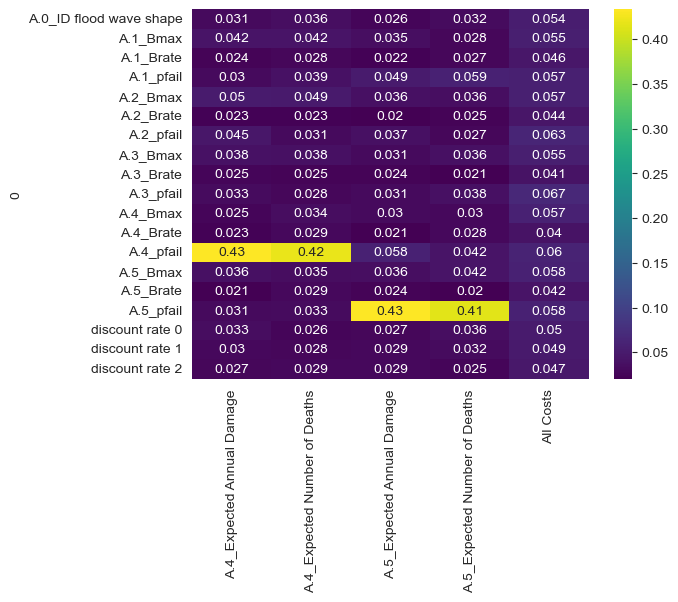

In [6]:
# Iterate through the keys in the outcomes dictionary
filtered_outcomes = {}
for key in outcomes.keys():
    # Check if the key starts with 'A.1_'
    if key.startswith('A.4_') or key.startswith('A.5_') or key.startswith('All') :
        filtered_outcomes[key] = outcomes[key]

# Picking the uncertainties and desired outcomes
x = experiments.iloc[:, [_ for _ in range(19)]]
y = filtered_outcomes

# Calculate feature scores
fs = feature_scoring.get_feature_scores_all(x, y)

# Plot the heatmap
sns.heatmap(fs, cmap="viridis", annot=True)
plt.show()


## Total Expected Annual Damage aggregation 

In [7]:
# Extract the arrays
A1 = outcomes['A.1_Expected Annual Damage']
A2 = outcomes['A.2_Expected Annual Damage']
A3 = outcomes['A.3_Expected Annual Damage']
A4 = outcomes['A.4_Expected Annual Damage']
A5 = outcomes['A.5_Expected Annual Damage']

aggregated_data = {'Total Expected Damage': A1 + A2 + A3 + A4 + A5}


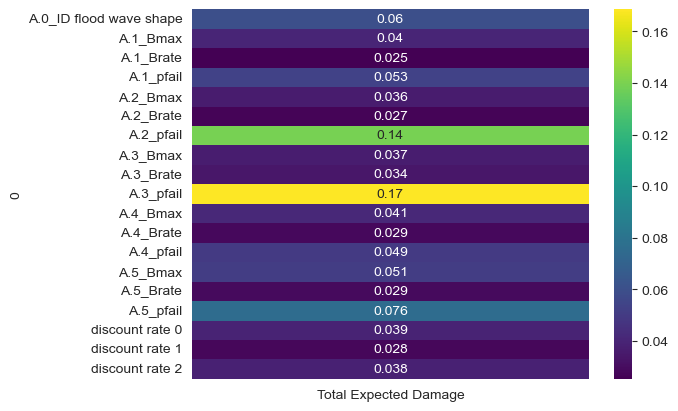

In [8]:
fs = feature_scoring.get_feature_scores_all(x, aggregated_data)
sns.heatmap(fs, cmap="viridis", annot=True)
plt.show()

### Contribution of objectives to Total Costs

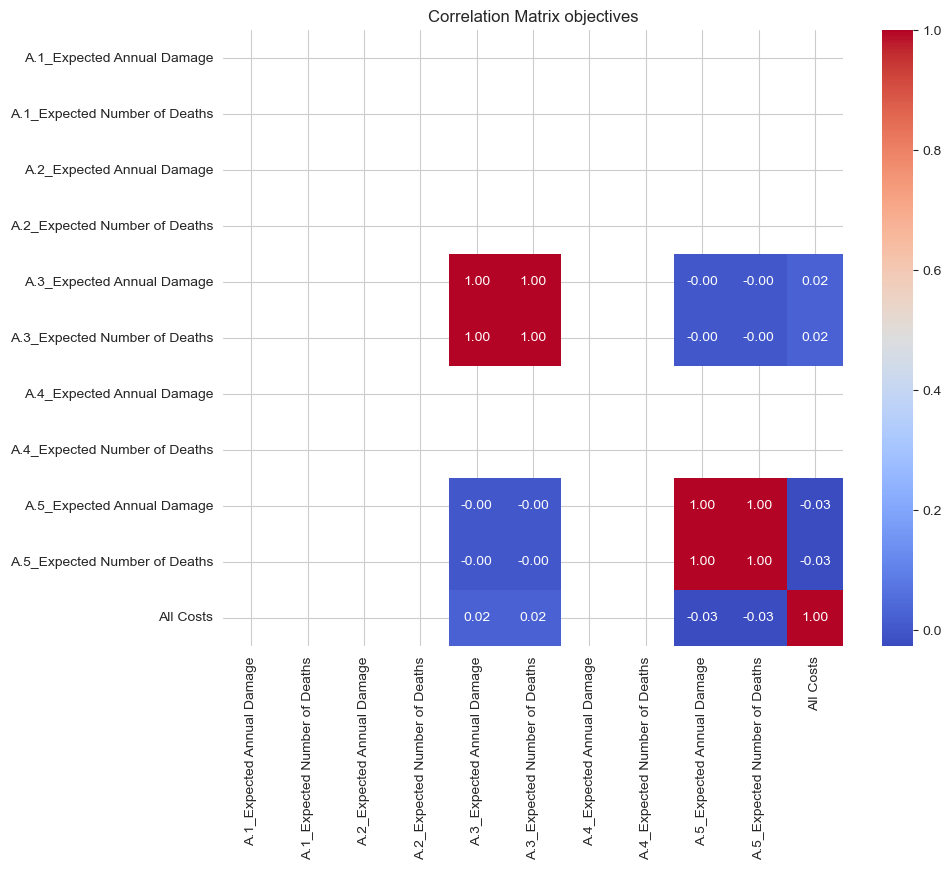

In [9]:
data = {}
for k,v in outcomes.items():
    if len(v.shape)>1:
        v=v[:,-1]
    data[k] = v
data = pd.DataFrame.from_dict(data)

#calcualting correlations between the outcomes of interest
correlations = data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlations, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix objectives')
plt.show()